# **Real-time Fraud/Anomaly Detection for Financial Transactions using Bank Account Fraud (BAF) Tabular Dataset Suite**

## Load the dataset from kaggle using kaggle api

In [ ]:
!pip install kaggle --upgrade --quiet

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"usamaafzal36","key":"da59ca8e0f2567fb3f0adb0f90d3d75e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d sgpjesus/bank-account-fraud-dataset-neurips-2022

# Unzip / decompress
!unzip bank-account-fraud-dataset-neurips-2022.zip -d baf_dataset

Dataset URL: https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022
License(s): CC-BY-NC-SA-4.0
 97% 518M/532M [00:06<00:00, 108MB/s]
100% 532M/532M [00:06<00:00, 80.6MB/s]
Archive:  bank-account-fraud-dataset-neurips-2022.zip
  inflating: baf_dataset/Base.csv    
  inflating: baf_dataset/Variant I.csv  
  inflating: baf_dataset/Variant II.csv  
  inflating: baf_dataset/Variant III.csv  
  inflating: baf_dataset/Variant IV.csv  
  inflating: baf_dataset/Variant V.csv  


In [ ]:
# List what files you have
!ls baf_dataset

 Base.csv	 'Variant II.csv'   'Variant IV.csv'
'Variant I.csv'  'Variant III.csv'  'Variant V.csv'


## EDA

In [ ]:
sjimport numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('baf_dataset/Base.csv')
df.head()


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


### Missing values






In [ ]:
df.isnull().sum()

,0
fraud_bool,0
income,0
name_email_similarity,0
prev_address_months_count,0
current_address_months_count,0
customer_age,0
days_since_request,0
intended_balcon_amount,0
payment_type,0
zip_count_4w,0


### Duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

### Categorical Features

In [ ]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.head()

,payment_type,employment_status,housing_status,source,device_os
0,AA,CB,BC,INTERNET,linux
1,AD,CA,BC,INTERNET,other
2,AB,CA,BC,INTERNET,windows
3,AB,CA,BC,INTERNET,linux
4,AA,CA,BC,INTERNET,other


In [ ]:
categorical_features.nunique()

,0
payment_type,5
employment_status,7
housing_status,7
source,2
device_os,5


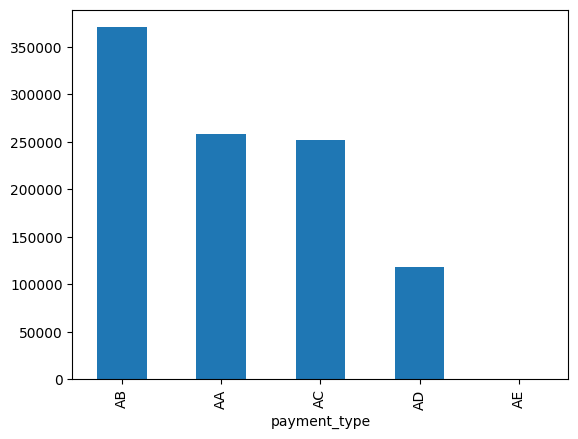

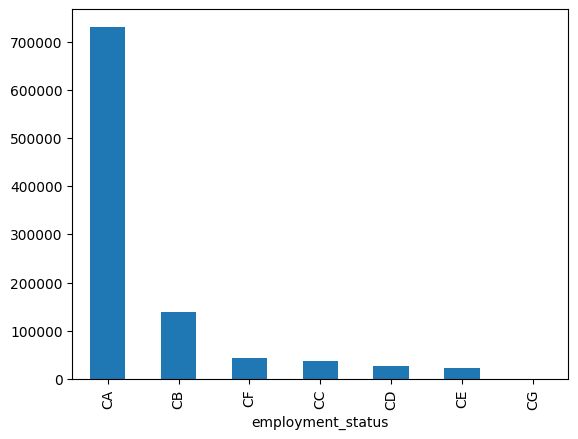

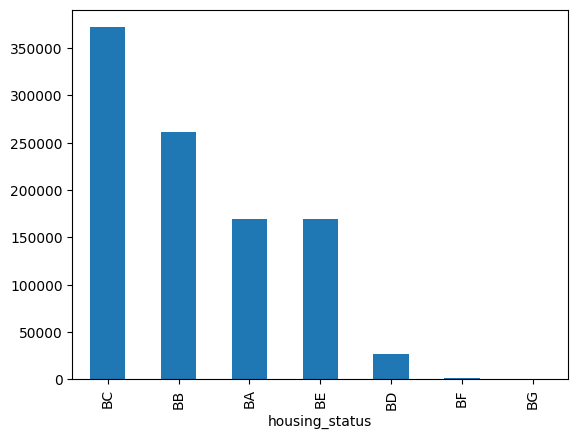

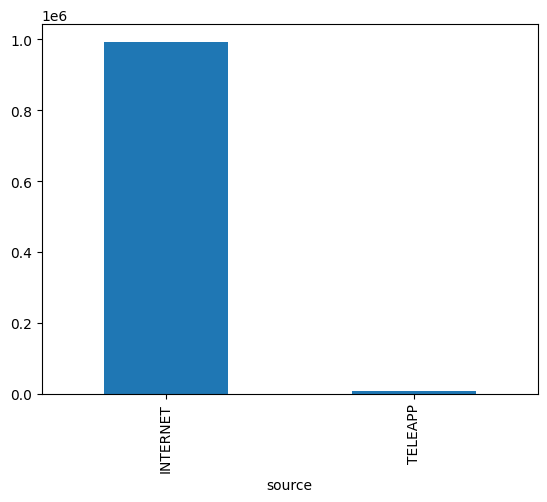

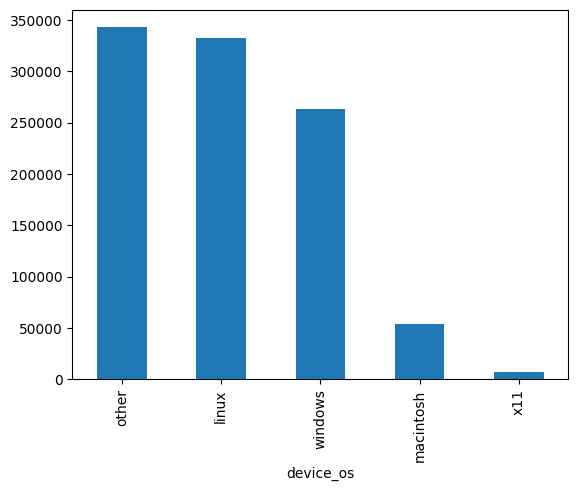

In [ ]:
for feature in categorical_features.columns:
  categorical_features[feature].value_counts().plot(kind='bar')
  plt.show()

### Numerical Features

In [ ]:
numerical_features = df.select_dtypes(exclude=['object'])
numerical_features.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,1,9,0,1500.0,0,16.224843,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,1,2,0,1500.0,0,3.363854,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,1,30,0,200.0,0,22.730559,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,1,1,0,200.0,0,15.215816,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,1,26,0,200.0,0,3.743048,0,1,0,0


### Discrete Features

In [ ]:
discrete_features = [feature for feature in numerical_features.columns if df[feature].nunique()<=25]
discrete_features = df[discrete_features]
discrete_features.head()

,fraud_bool,income,customer_age,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,40,1,0,1,0,1500.0,0,1,1,0,0
1,0,0.8,20,1,1,1,0,1500.0,0,1,1,0,0
2,0,0.8,40,1,0,1,0,200.0,0,0,1,0,0
3,0,0.6,30,1,0,1,0,200.0,0,1,1,0,0
4,0,0.9,40,0,1,1,0,200.0,0,0,1,0,0


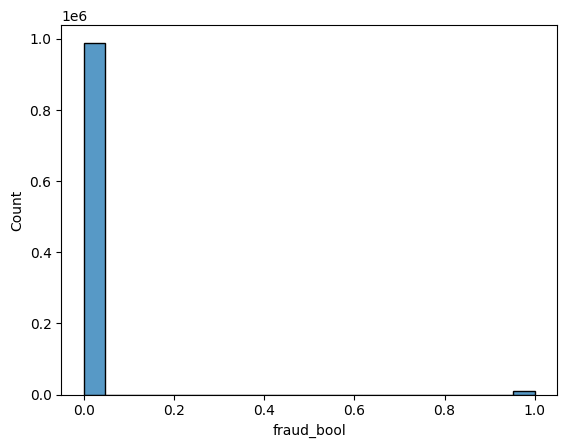

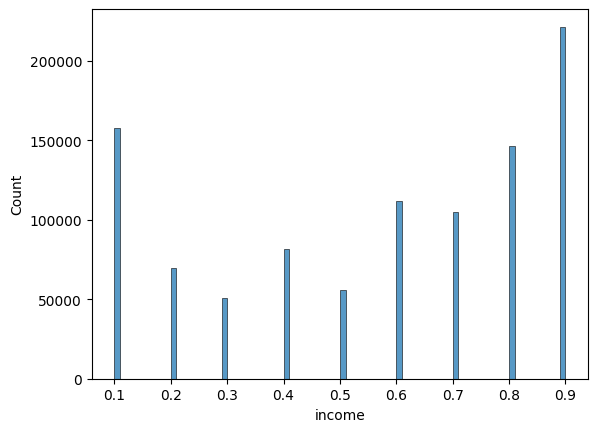

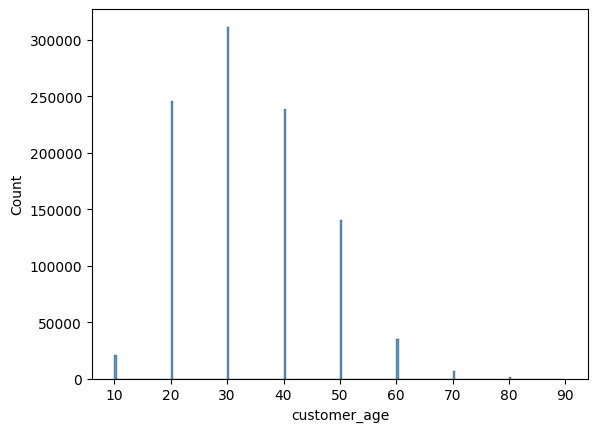

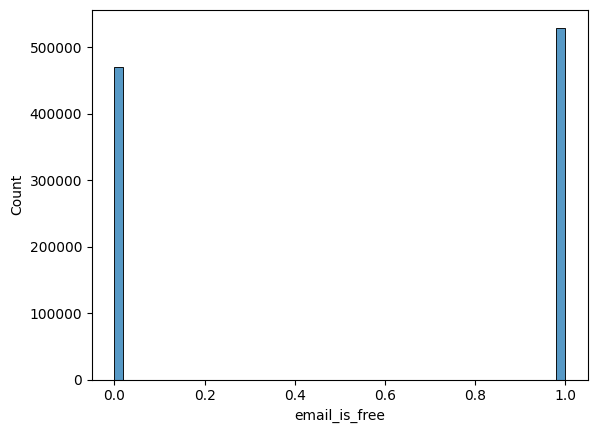

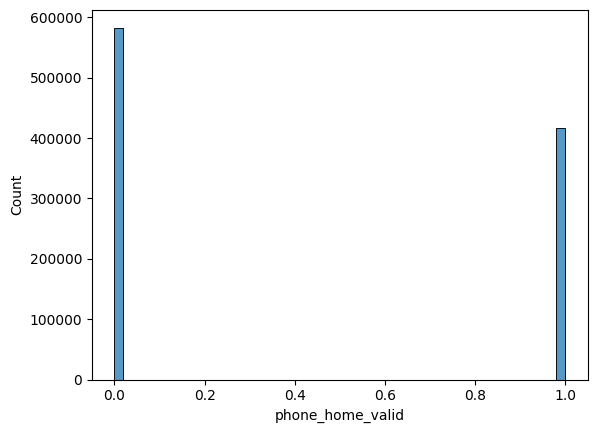

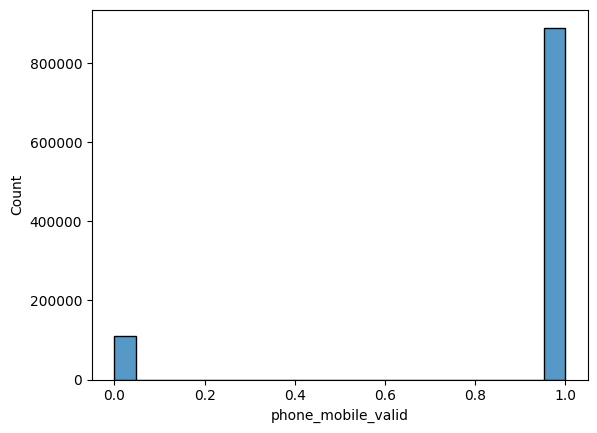

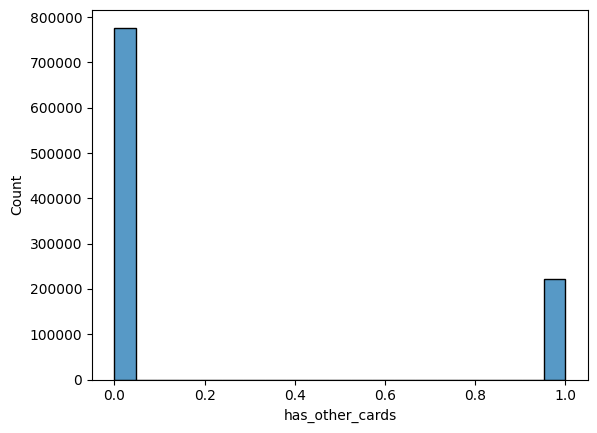

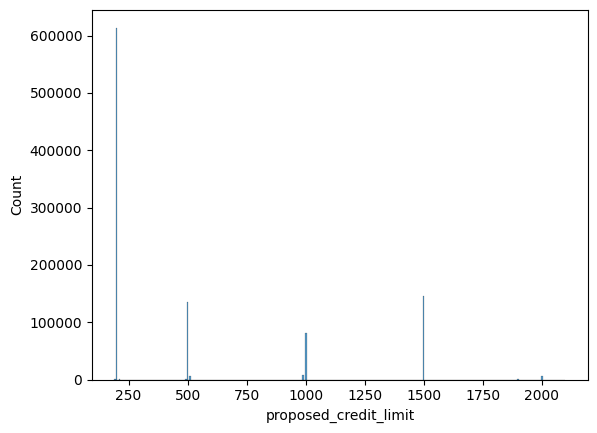

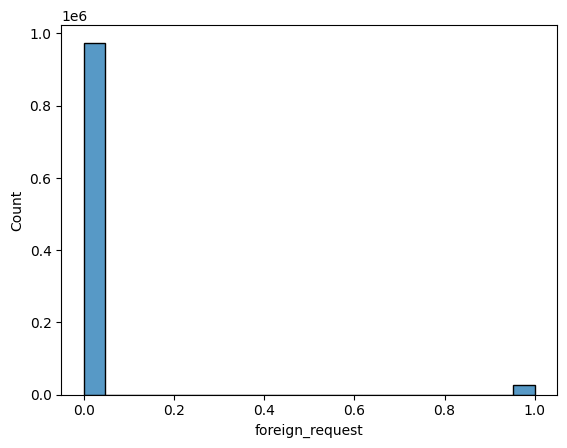

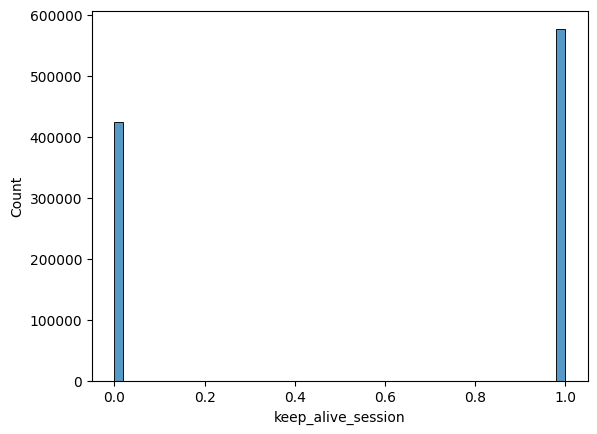

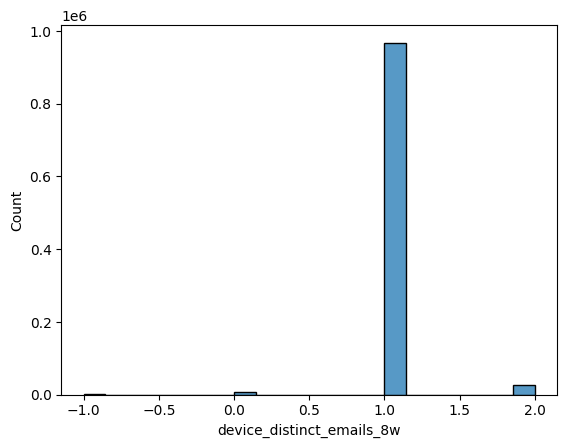

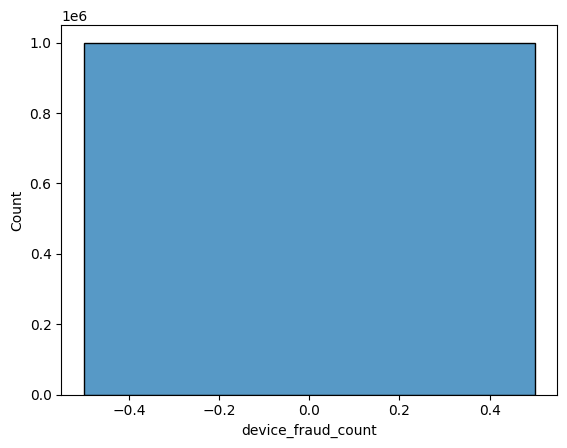

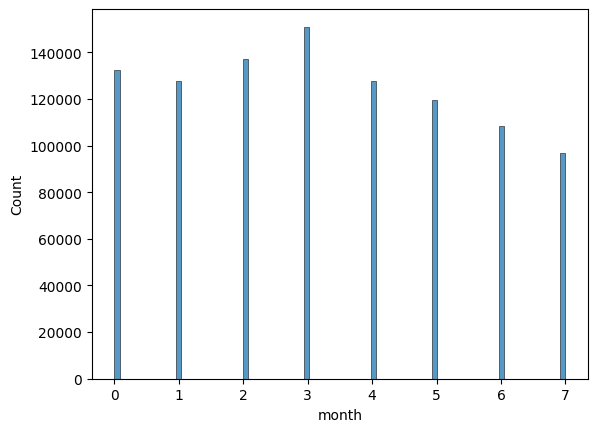

In [ ]:
for feature in discrete_features.columns:
  sns.histplot(discrete_features[feature])
  plt.show()

In [ ]:
for feature in discrete_features.columns:
  sns.countplot(discrete_features[feature])
  plt.show()

KeyboardInterrupt: 

In [ ]:
for feature in discrete_features.columns:
  sns.boxplot(discrete_features[feature])
  plt.show()

### Continuous Features

In [ ]:
continuous_features = [feature for feature in numerical_features.columns if feature not in discrete_features]
continuous_features = df[continuous_features]
continuous_features.head()

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,session_length_in_minutes
0,0.986506,-1,25,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,9,16.224843
1,0.617426,-1,89,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,2,3.363854
2,0.996707,9,14,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,30,22.730559
3,0.475100,11,14,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,15.215816
4,0.842307,-1,29,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,26,3.743048


In [ ]:
for feature in continuous_features.columns:
  sns.histplot(continuous_features[feature])
  plt.show()

In [ ]:
for feature in continuous_features.columns:
  sns.boxplot(continuous_features[feature])
  plt.show()

## Feature Engineering

### 1. Imbalanced Dataset

### 2. Outliers

## Data Transformation

### 1. Encoding

### 2. Preprocessing

## Feature Selection

## Mode Training

## Hyperparameter Tuning